In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Data.csv', low_memory=False)

In [3]:
sample = df

100%|██████████| 12/12 [5:23:45<00:00, 1942.49s/it]  


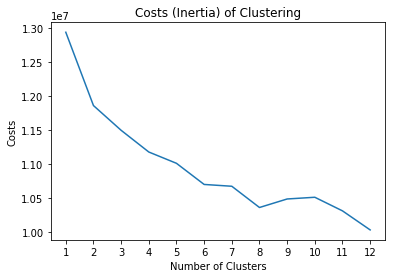

In [4]:
from sklearn.preprocessing import MinMaxScaler
from kmodes.kmodes import KModes

clusters = []
costs = []
#no need for scaling for this alghoritm
# scaler = MinMaxScaler().fit(sample)
# x = pd.DataFrame(scaler.transform(sample))
x = sample
for i in tqdm(range(1,13)):
    km=KModes(n_clusters=i,init='Huang', n_init=3)
    km=km.fit(x)
    
    clusters.append(i)
    costs.append(km.cost_)
    
plt.figure()
plt.plot(clusters, costs)
plt.title("Costs (Inertia) of Clustering")
plt.ylabel("Costs")
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(1,13,1))
plt.show()

In [5]:
km=KModes(n_clusters=8,init='Huang', n_init=3)
clusters=km.fit_predict(x)
sample["Cluster"]=clusters


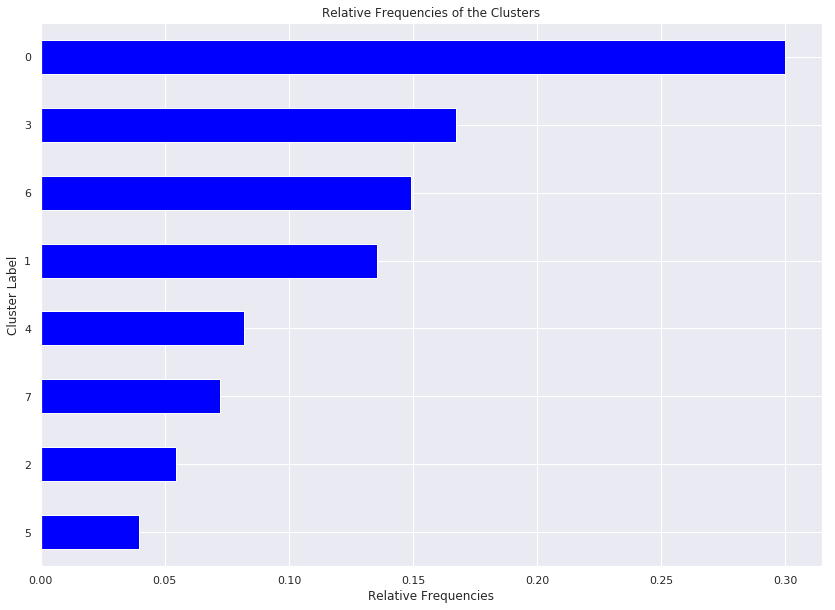

In [43]:
freq=sample.Cluster.value_counts(normalize=True, ascending=True)
freq.plot(kind="barh", color="Blue")
plt.title("Relative Frequencies of the Clusters")
plt.xlabel("Relative Frequencies")
plt.ylabel("Cluster Label")
plt.show()


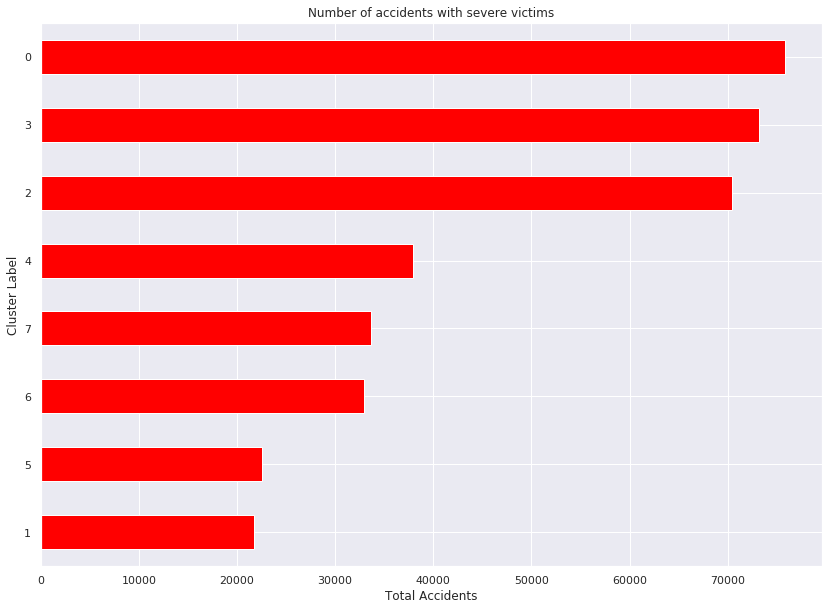

In [44]:
#number of severe victims(hospitilized or fatal injuries)
injuries=sample[(sample["severity"]==2) | (sample["severity"]==3)]
freq=injuries.Cluster.value_counts(ascending=True)
freq.plot(kind="barh", color="Red")
plt.title("Number of accidents with severe victims")
plt.xlabel("Total Accidents")
plt.ylabel("Cluster Label")
plt.show()

In [45]:
tmp = sample.groupby('Cluster').count()
total = sample.Cluster.value_counts( ascending=True)
total_injured = injuries.Cluster.value_counts( ascending=True)
risk = freq/tmp.iloc[:,0]
clusters = np.arange(0,8,1)
#interection stayed 214 null
sample["intersection"] = df["intersection"].replace(0,9) #9 is other



df_injuries = pd.DataFrame({"cluster" : clusters, "total accidents" : total,
                        "total severe victims" :  total_injured,"x(%) risk" : risk*100})
df_injuries

,cluster,total accidents,total severe victims,x(%) risk
0,0,505915,75811,14.984928
1,1,228645,21782,9.526559
2,2,91703,70424,76.795743
3,3,282631,73228,25.909401
4,4,138043,37933,27.479119
5,5,66816,22580,33.794301
6,6,252125,32895,13.047100
7,7,122194,33636,27.526720


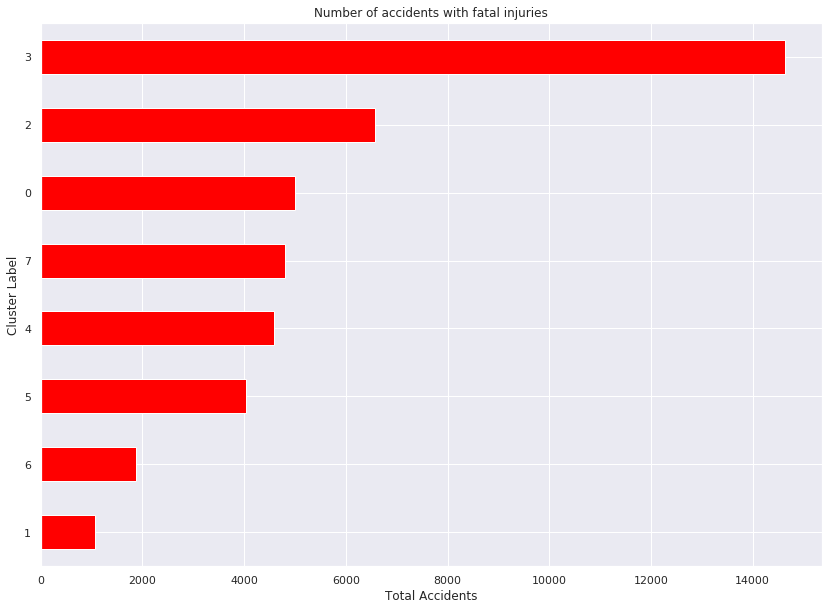

In [46]:
deaths=sample[sample["severity"]==2]
freq=deaths.Cluster.value_counts(ascending=True)
freq.plot(kind="barh", color="Red")
plt.title("Number of accidents with fatal injuries")
plt.xlabel("Total Accidents")
plt.ylabel("Cluster Label")
plt.show()

In [47]:
tmp = sample.groupby('Cluster').count()
total = sample.Cluster.value_counts( ascending=True)
total_injured = deaths.Cluster.value_counts( ascending=True)
risk = freq/tmp.iloc[:,0]
clusters = np.arange(0,8,1)

df_deaths = pd.DataFrame({"cluster" : clusters, "total accidents" : total,
                        "total deaths" :  total_injured,"x(%) risk" : risk*100})
df_deaths

,cluster,total accidents,total deaths,x(%) risk
0,0,505915,4993,0.986925
1,1,228645,1069,0.467537
2,2,91703,6581,7.176428
3,3,282631,14629,5.176007
4,4,138043,4590,3.325051
5,5,66816,4043,6.050946
6,6,252125,1878,0.744869
7,7,122194,4799,3.927361


In [50]:
#average values for few selected atributes
#lighting roadCategory atmosphericCondition Curve safetyEquipment
data_lighting = df.groupby(by="lighting", as_index=False).count()
data_lighting = data_lighting.iloc[:,1]/data_lighting.iloc[:,1].sum()

data_roadCategory = df.groupby(by='roadCategory', as_index=False).count()
data_roadCategory = data_roadCategory.iloc[:,1]/data_roadCategory.iloc[:,1].sum()

data_atmCond = df.groupby(by="atmosphericCondition", as_index=False).count()
data_atmCond = data_atmCond.iloc[:,1]/data_atmCond.iloc[:,1].sum()

data_curve = df.groupby(by="Curve", as_index=False).count()
data_curve = data_curve.iloc[:,1]/data_curve.iloc[:,1].sum()

data_safetyEq = df.groupby(by="safetyEquipment", as_index=False).count()
data_safetyEq = data_safetyEq.iloc[:,1]/data_safetyEq.iloc[:,1].sum()


#added for kmodes

data_intersection = df.groupby(by="intersection", as_index=False).count()
data_intersection = data_intersection.iloc[:,1]/data_intersection.iloc[:,1].sum()

data_work_day = df.groupby(by="work_day", as_index=False).count()
data_work_day = data_work_day.iloc[:,1]/data_work_day.iloc[:,1].sum()

data_holiday = df.groupby(by="near_holiday", as_index=False).count()
data_holiday = data_holiday.iloc[:,1]/data_holiday.iloc[:,1].sum()

data_reason = df.groupby(by="reasonForTraveling", as_index=False).count()
data_reason = data_reason.iloc[:,1]/data_reason.iloc[:,1].sum()

data_collision_type = df.groupby(by="collisionType", as_index=False).count()
data_collision_type = data_collision_type.iloc[:,1]/data_collision_type.iloc[:,1].sum()


In [51]:
cluster_2 = sample.loc[sample["Cluster"] == 2]

cl2_lighting = cluster_2.groupby(by="lighting", as_index=False).count()

#key={1:"Full day", 2: "Twilight or dawn", 3:"Night without public lighting",
#        4:"Night with public lighting", 5:"Night with public lighting on"}
#cl3_lighting.lighting=cl3_lighting.lighting.apply(lambda x: key[x])
cl2_lighting["pctg"] = cl2_lighting.iloc[:,1]/cl2_lighting.iloc[:,1].sum() 


cl2_roadCtg = cluster_2.groupby(by="roadCategory", as_index=False).count()

#key={1:"Highway", 2: "National Road", 3:" Departmental Road",
#        4:"Communal Way", 5:"other"}
#cl3_roadCtg.roadCategory =cl3_roadCtg.roadCategory.apply(lambda x: key[x])
cl2_roadCtg["pctg"] = cl2_roadCtg.iloc[:,1]/cl2_roadCtg.iloc[:,1].sum() 


cl2_atmCond = cluster_2.groupby(by="atmosphericCondition", as_index=False).count()
cl2_atmCond["pctg"] = cl2_atmCond.iloc[:,1]/cl2_atmCond.iloc[:,1].sum() 


cl2_curve = cluster_2.groupby(by="Curve", as_index=False).count()
cl2_curve["pctg"] = cl2_curve.iloc[:,1]/cl2_curve.iloc[:,1].sum() 


cl2_safetyEq = cluster_2.groupby(by="safetyEquipment", as_index=False).count()
cl2_safetyEq["pctg"] = cl2_safetyEq.iloc[:,1]/cl2_safetyEq.iloc[:,1].sum() 

#added for kmodes
cl2_intersection = cluster_2.groupby(by="intersection", as_index=False).count()
cl2_intersection["pctg"] = cl2_intersection.iloc[:,1]/cl2_intersection.iloc[:,1].sum() 

cl2_work_day = cluster_2.groupby(by="work_day", as_index=False).count()
cl2_work_day["pctg"] = cl2_work_day.iloc[:,1]/cl2_work_day.iloc[:,1].sum() 

cl2_holiday = cluster_2.groupby(by="near_holiday", as_index=False).count()
cl2_holiday["pctg"] = cl2_holiday.iloc[:,1]/cl2_holiday.iloc[:,1].sum() 

cl2_reason = cluster_2.groupby(by="reasonForTraveling", as_index=False).count()
cl2_reason["pctg"] = cl2_reason.iloc[:,1]/cl2_reason.iloc[:,1].sum()

cl2_collision_type = cluster_2.groupby(by="collisionType", as_index=False).count()
cl2_collision_type["pctg"] = cl2_collision_type.iloc[:,1]/cl2_collision_type.iloc[:,1].sum()

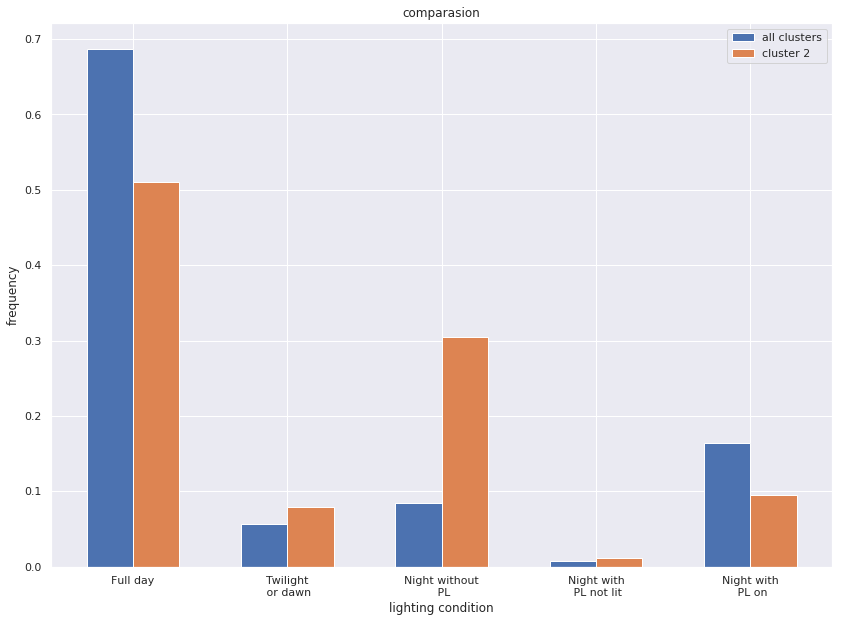

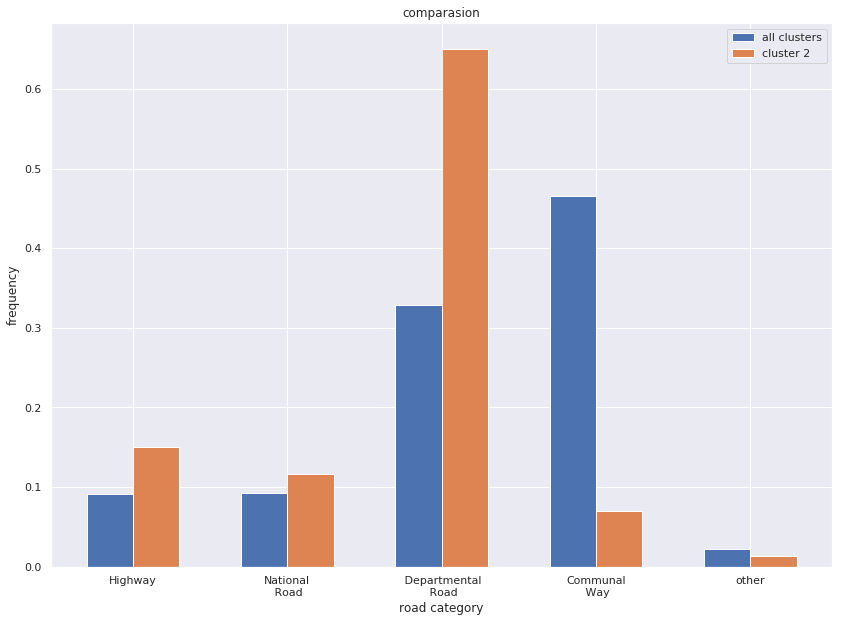

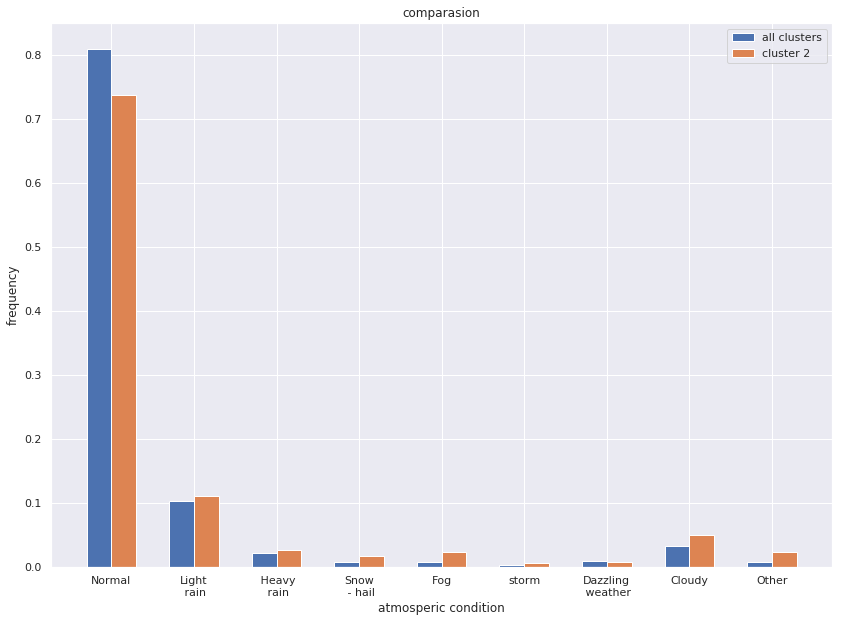

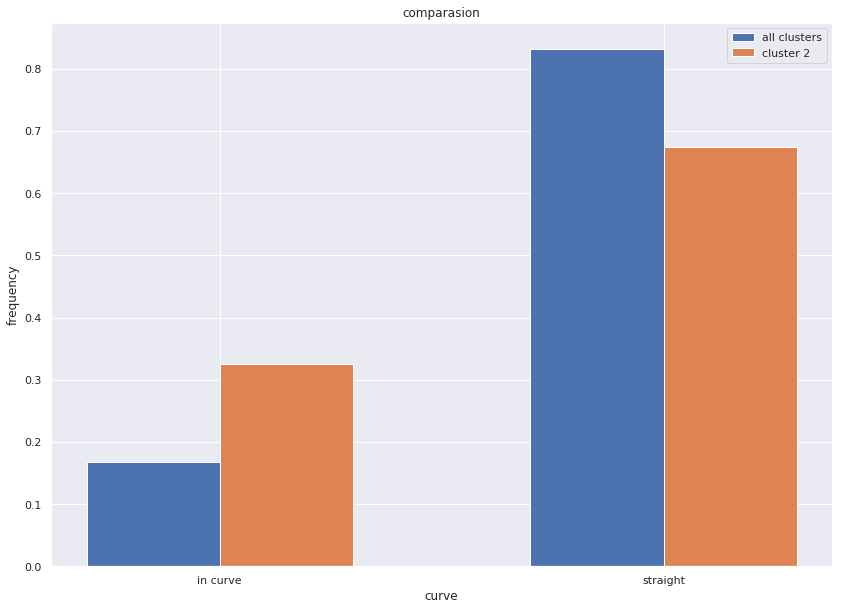

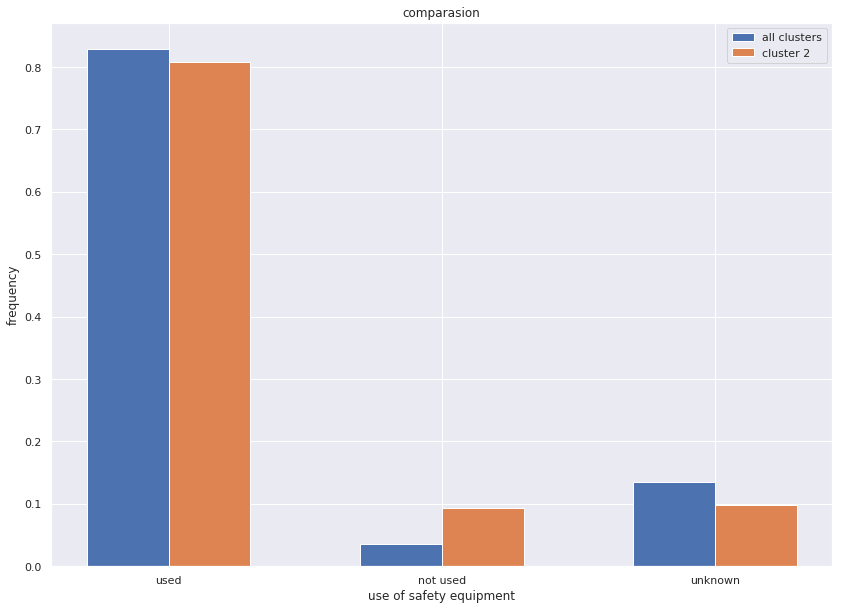

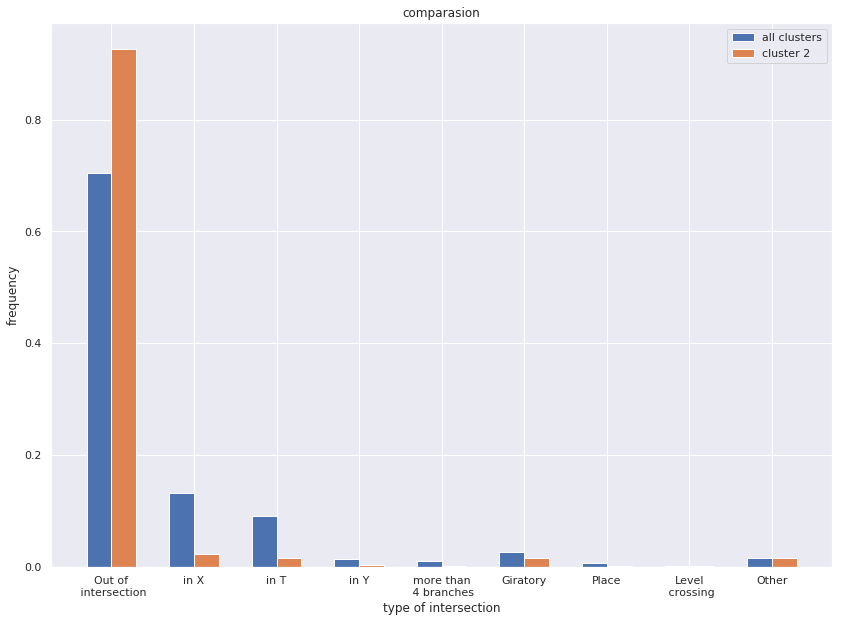

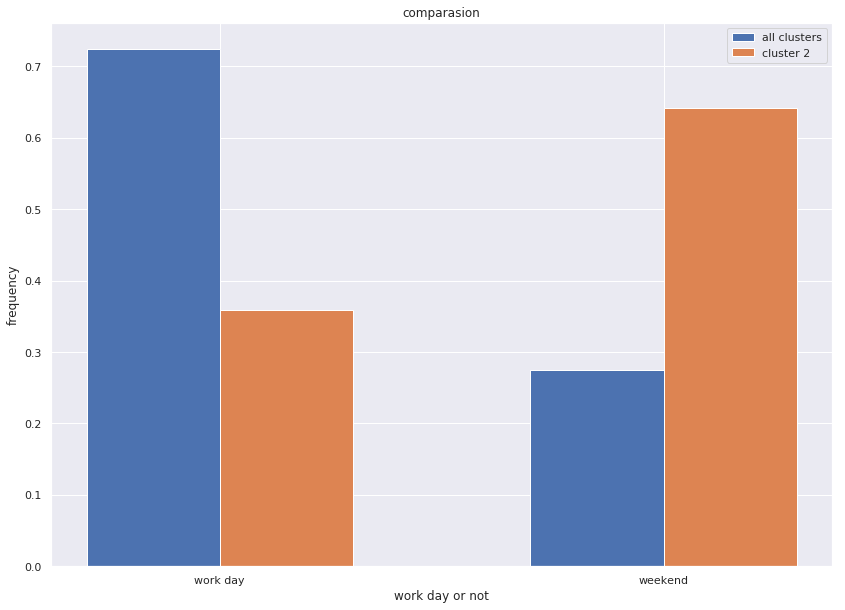

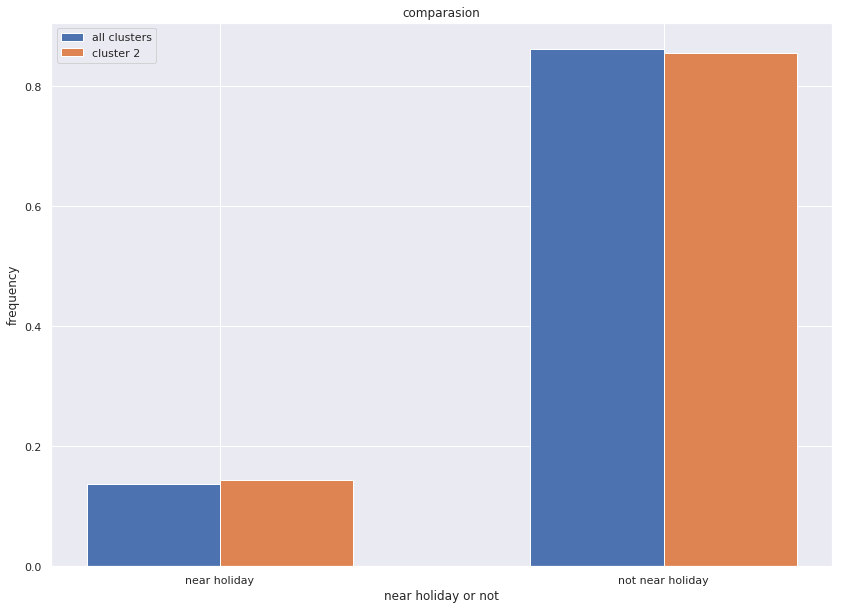

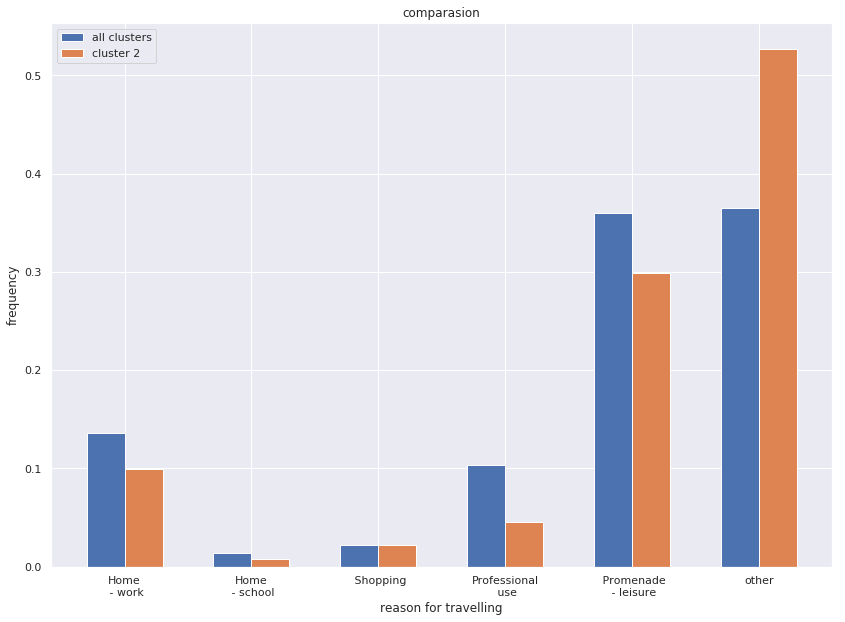

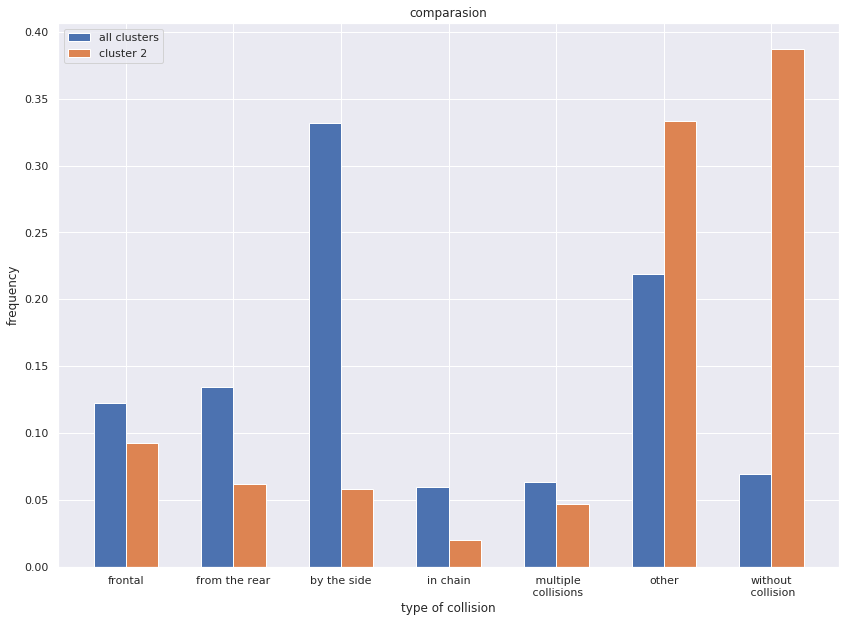

In [58]:
import matplotlib.pyplot as plt

index = np.arange(5)
bar_width = 0.3

fig, ax = plt.subplots()
average = ax.bar(index, data_lighting, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_lighting.pctg,bar_width, label="cluster 2")

ax.set_xlabel('lighting condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Full day", "Twilight\n or dawn", "Night without\n PL",
                    "Night with\n PL not lit", "Night with\n PL on"])

ax.legend()

plt.show()


index = np.arange(5)
fig, ax = plt.subplots()
average = ax.bar(index, data_roadCategory, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_roadCtg.pctg,bar_width, label="cluster 2")

ax.set_xlabel('road category')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Highway", "National\n Road", " Departmental\n Road",
                    "Communal\n Way", "other"])

ax.legend()

plt.show()



index = np.arange(9)
fig, ax = plt.subplots()
average = ax.bar(index, data_atmCond, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_atmCond.pctg,bar_width, label="cluster 2")

ax.set_xlabel('atmosperic condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Normal", "Light\n rain", " Heavy\n rain",
                    "Snow\n - hail", "Fog","storm","Dazzling\n weather","Cloudy","Other"])

ax.legend()

plt.show()



index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_curve, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_curve.pctg,bar_width, label="cluster 2")

ax.set_xlabel('curve')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["in curve", "straight"])

ax.legend()

plt.show()


index = np.arange(3)
fig, ax = plt.subplots()
average = ax.bar(index, data_safetyEq, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_safetyEq.pctg,bar_width, label="cluster 2")

ax.set_xlabel('use of safety equipment')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["used", "not used","unknown"])

ax.legend()

plt.show()

#adde in kmodes

index = np.arange(9)
fig, ax = plt.subplots()
average = ax.bar(index, data_intersection, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_intersection.pctg,bar_width, label="cluster 2")

ax.set_xlabel('type of intersection')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Out of\n intersection", "in X","in T","in Y",
                    "more than\n 4 branches","Giratory","Place","Level\n crossing","Other"])

ax.legend()

plt.show()

index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_work_day, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_work_day.pctg,bar_width, label="cluster 2")

ax.set_xlabel('work day or not')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["work day", "weekend"])

ax.legend()

plt.show()

index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_holiday, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_holiday.pctg,bar_width, label="cluster 2")

ax.set_xlabel('near holiday or not')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["near holiday", "not near holiday"])

ax.legend()

plt.show()

index = np.arange(6)
fig, ax = plt.subplots()
average = ax.bar(index, data_reason, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_reason.pctg,bar_width, label="cluster 2")

ax.set_xlabel('reason for travelling')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Home\n - work", "Home\n - school", " Shopping",
                    "Professional\n use", " Promenade\n - leisure","other"])

ax.legend()

plt.show()



index = np.arange(7)
fig, ax = plt.subplots()
average = ax.bar(index, data_collision_type, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl2_collision_type.pctg,bar_width, label="cluster 2")

ax.set_xlabel('type of collision')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["frontal", "from the rear", "by the side",
                    "in chain", " multiple\n collisions","other","without\n collision"])

ax.legend()

plt.show()

In [56]:
cluster_3 = sample.loc[sample["Cluster"] == 3]

cl3_lighting = cluster_3.groupby(by="lighting", as_index=False).count()

#key={1:"Full day", 2: "Twilight or dawn", 3:"Night without public lighting",
#        4:"Night with public lighting", 5:"Night with public lighting on"}
#cl3_lighting.lighting=cl3_lighting.lighting.apply(lambda x: key[x])
cl3_lighting["pctg"] = cl3_lighting.iloc[:,1]/cl3_lighting.iloc[:,1].sum() 


cl3_roadCtg = cluster_3.groupby(by="roadCategory", as_index=False).count()

#key={1:"Highway", 2: "National Road", 3:" Departmental Road",
#        4:"Communal Way", 5:"other"}
#cl3_roadCtg.roadCategory =cl3_roadCtg.roadCategory.apply(lambda x: key[x])
cl3_roadCtg["pctg"] = cl3_roadCtg.iloc[:,1]/cl3_roadCtg.iloc[:,1].sum() 


cl3_atmCond = cluster_3.groupby(by="atmosphericCondition", as_index=False).count()
cl3_atmCond["pctg"] = cl3_atmCond.iloc[:,1]/cl3_atmCond.iloc[:,1].sum() 


cl3_curve = cluster_3.groupby(by="Curve", as_index=False).count()
cl3_curve["pctg"] = cl3_curve.iloc[:,1]/cl3_curve.iloc[:,1].sum() 


cl3_safetyEq = cluster_3.groupby(by="safetyEquipment", as_index=False).count()
cl3_safetyEq["pctg"] = cl3_safetyEq.iloc[:,1]/cl3_safetyEq.iloc[:,1].sum() 

#added for kmodes
cl3_intersection = cluster_3.groupby(by="intersection", as_index=False).count()
cl3_intersection["pctg"] = cl3_intersection.iloc[:,1]/cl3_intersection.iloc[:,1].sum() 

cl3_work_day = cluster_3.groupby(by="work_day", as_index=False).count()
cl3_work_day["pctg"] = cl3_work_day.iloc[:,1]/cl3_work_day.iloc[:,1].sum() 

cl3_holiday = cluster_3.groupby(by="near_holiday", as_index=False).count()
cl3_holiday["pctg"] = cl3_holiday.iloc[:,1]/cl3_holiday.iloc[:,1].sum() 

cl3_reason = cluster_3.groupby(by="reasonForTraveling", as_index=False).count()
cl3_reason["pctg"] = cl3_reason.iloc[:,1]/cl3_reason.iloc[:,1].sum()

cl3_collision_type = cluster_3.groupby(by="collisionType", as_index=False).count()
cl3_collision_type["pctg"] = cl3_collision_type.iloc[:,1]/cl3_collision_type.iloc[:,1].sum()

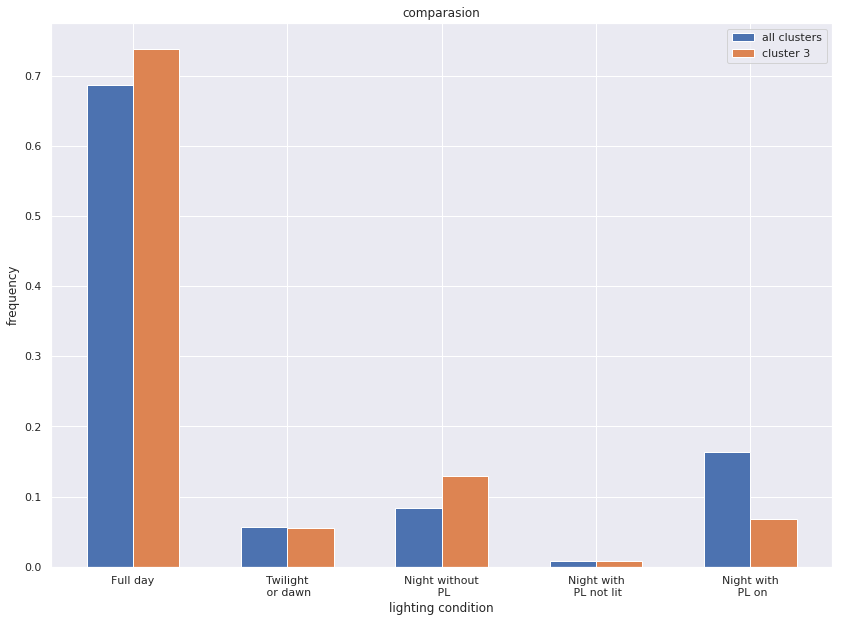

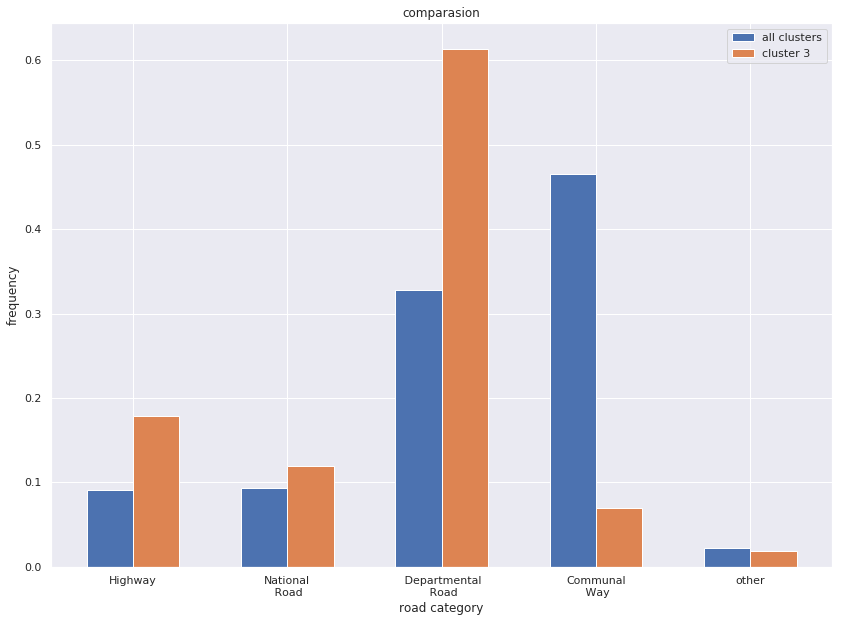

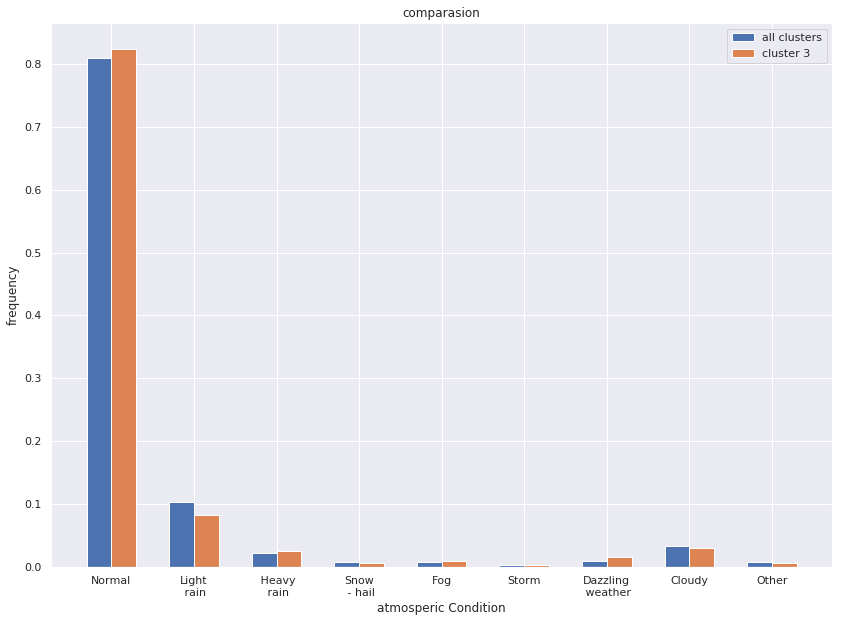

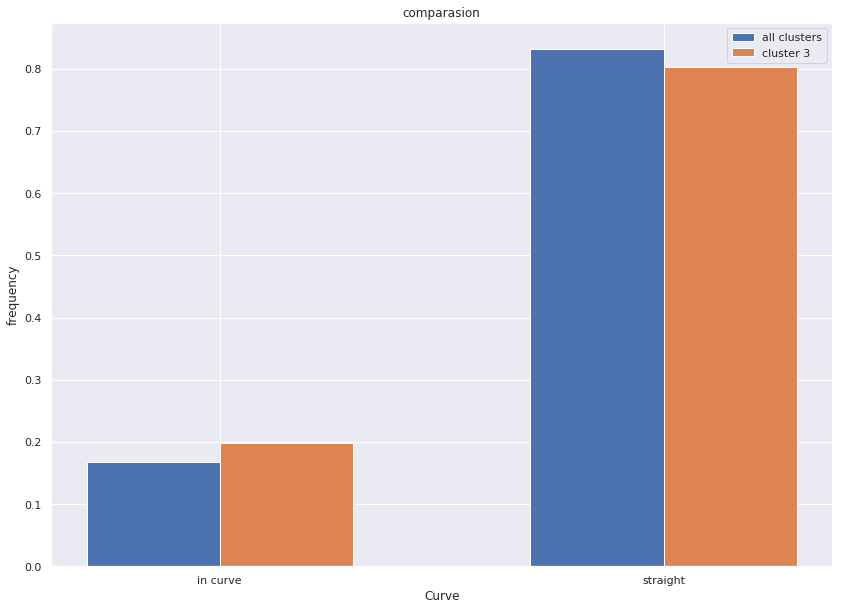

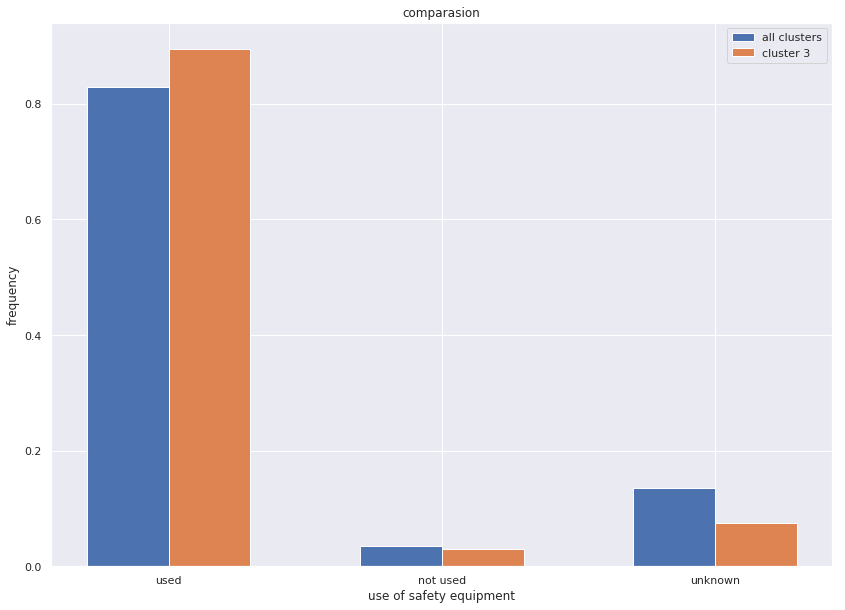

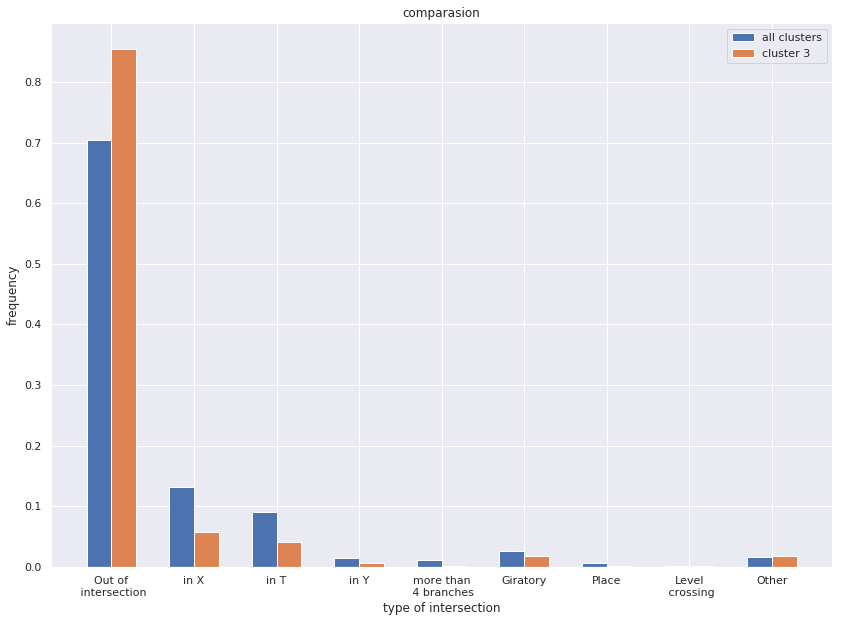

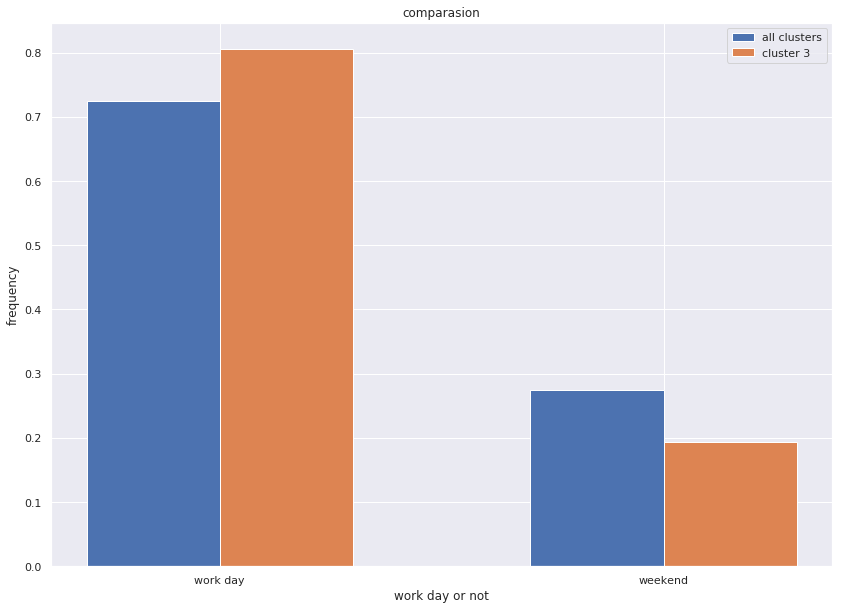

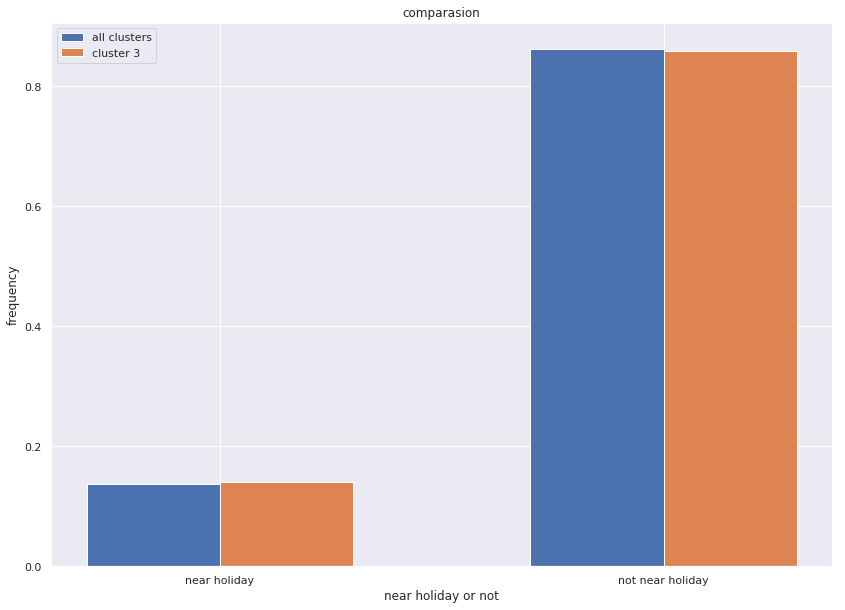

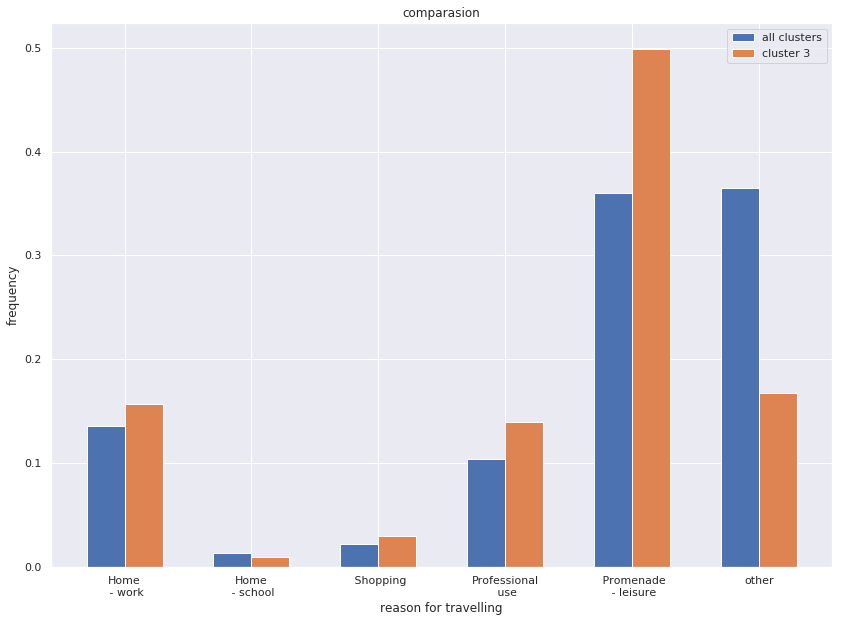

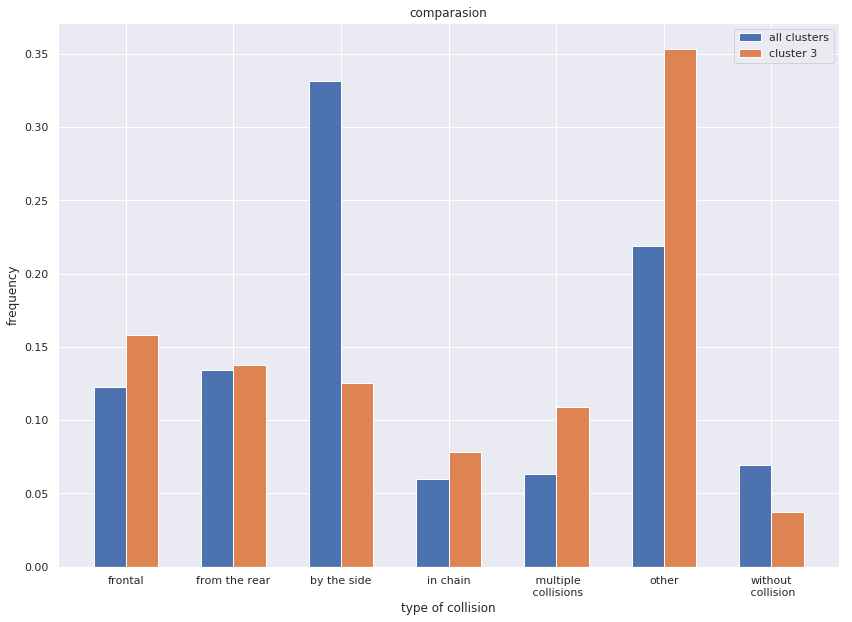

In [57]:
index = np.arange(5)
bar_width = 0.3

fig, ax = plt.subplots()
average = ax.bar(index, data_lighting, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_lighting.pctg,bar_width, label="cluster 3")

ax.set_xlabel('lighting condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Full day", "Twilight\n or dawn", "Night without\n PL",
                    "Night with\n PL not lit", "Night with\n PL on"])

ax.legend()

plt.show()


index = np.arange(5)
fig, ax = plt.subplots()
average = ax.bar(index, data_roadCategory, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_roadCtg.pctg,bar_width, label="cluster 3")

ax.set_xlabel('road category')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Highway", "National\n Road", " Departmental\n Road",
                    "Communal\n Way", "other"])

ax.legend()

plt.show()



index = np.arange(9)
fig, ax = plt.subplots()
average = ax.bar(index, data_atmCond, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_atmCond.pctg,bar_width, label="cluster 3")

ax.set_xlabel('atmosperic Condition')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Normal", "Light\n rain", " Heavy\n rain",
                    "Snow\n - hail", "Fog\n" ,"Storm","Dazzling\n weather","Cloudy","Other"])

ax.legend()

plt.show()



index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_curve, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_curve.pctg,bar_width, label="cluster 3")

ax.set_xlabel('Curve')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["in curve", "straight"])

ax.legend()

plt.show()


index = np.arange(3)
fig, ax = plt.subplots()
average = ax.bar(index, data_safetyEq, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_safetyEq.pctg,bar_width, label="cluster 3")

ax.set_xlabel('use of safety equipment')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["used", "not used","unknown"])

ax.legend()

plt.show()

#added in kmodes


index = np.arange(9)
fig, ax = plt.subplots()
average = ax.bar(index, data_intersection, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_intersection.pctg,bar_width, label="cluster 3")

ax.set_xlabel('type of intersection')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Out of\n intersection", "in X","in T","in Y",
                    "more than\n 4 branches","Giratory","Place","Level\n crossing","Other"])

ax.legend()

plt.show()

index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_work_day, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_work_day.pctg,bar_width, label="cluster 3")

ax.set_xlabel('work day or not')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["work day", "weekend"])

ax.legend()

plt.show()

index = np.arange(2)
fig, ax = plt.subplots()
average = ax.bar(index, data_holiday, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_holiday.pctg,bar_width, label="cluster 3")

ax.set_xlabel('near holiday or not')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["near holiday", "not near holiday"])

ax.legend()

plt.show()

index = np.arange(6)
fig, ax = plt.subplots()
average = ax.bar(index, data_reason, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_reason.pctg,bar_width, label="cluster 3")

ax.set_xlabel('reason for travelling')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Home\n - work", "Home\n - school", " Shopping",
                    "Professional\n use", " Promenade\n - leisure","other"])

ax.legend()

plt.show()



index = np.arange(7)
fig, ax = plt.subplots()
average = ax.bar(index, data_collision_type, bar_width, label="all clusters")

cluster = ax.bar(index+bar_width, cl3_collision_type.pctg,bar_width, label="cluster 3")

ax.set_xlabel('type of collision')
ax.set_ylabel('frequency')
ax.set_title('comparasion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["frontal", "from the rear", "by the side",
                    "in chain", " multiple\n collisions","other","without\n collision"])

ax.legend()

plt.show()